# Selenium Assignment 2

### Q1

In [1]:
# Import necessary libraries

import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import ElementNotInteractableException,NoSuchElementException
import warnings
warnings.filter = 'ignore'

In [2]:
driver = webdriver.Chrome()                 # making web page automation
driver.get("http://www.amazon.in/")         # fatching web page
time.sleep(2)

### Q2

In [3]:
driver.refresh()

In [4]:
# taking input from user
item = str(input("Enter what you item you waqnt to search : "))

# searching itme 
search_item = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
search_item.send_keys(item)

# press search button
search_button = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search_button.click()

Enter what you item you waqnt to search : guitars


In [5]:
# fetching data link from mutiple page

product_url = []
start,end = 0,3
for page in range(start,end):
    
    
    url = driver.find_elements(By.XPATH,'//div[@class="a-section a-spacing-none a-spacing-top-small s-title-instructions-style"]/h2/a')
    for i in url:
        product_url.append(i.get_attribute("href"))   
        
    next_button = driver.find_elements(By.XPATH,"/html/body/div[1]/div[1]/div[1]/div[1]/div/span[1]/div[1]/div[69]/div/div/span/a[3]")    

In [6]:
product_url 

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4NDY2NTUwMzk2NDMyMDM4OjE3MDczNjg3MjA6c3BfYXRmOjMwMDAzMTMyOTU5MDczMjo6MDo6&url=%2FKadence-A281BK-Professional-Acoustic-Rosewood%2Fdp%2FB0CD7D6C6R%2Fref%3Dsr_1_1%3Fkeywords%3Dguitars%26qid%3D1707368720%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4NDY2NTUwMzk2NDMyMDM4OjE3MDczNjg3MjA6c3BfYXRmOjMwMDAyMjkzODAyNjEzMjo6MDo6&url=%2FKadence-Professional-Acoustic-Rosewood-Natural%2Fdp%2FB0CC927DLN%2Fref%3Dsr_1_2%3Fkeywords%3Dguitars%26qid%3D1707368720%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4NDY2NTUwMzk2NDMyMDM4OjE3MDczNjg3MjA6c3BfYXRmOjMwMDAxNTUzNzk3OTIzMjo6MDo6&url=%2FKadence-Frontier-Acoustic-Guitar-Strings%2Fdp%2FB078GTJP5Y%2Fref%3Dsr_1_3%3Fkeywords%3Dguitars%26qid%3D1707368720%26sr%3D8-3-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo4NDY2NTUwMzk

In [7]:
# Creating empty list
Brand_Name = []
Name_of_Product = []
price = []
Return_Exchange = []
Expected_Delivery = []
Availability = []


for link in product_url:
    driver.get(link) # getting all link and extracting data from all pages
    time.sleep(2)
    
    # Handling exceptions
    try:
        name = driver.find_element(By.XPATH,'//div[@class="a-section a-spacing-medium brand-snapshot-flex-row"]/p/span')
        Brand_Name.append(name.text)
    except NoSuchElementException :
        Brand_Name.append("-")

    try:
        NameOfProduct = driver.find_element(By.XPATH,'//span[@id="productTitle"]')
        Name_of_Product.append(NameOfProduct.text)
    except NoSuchElementException :
        Name_of_Product.append("-")
    
    try:
        rate = driver.find_element(By.XPATH,'//span[@class="a-price aok-align-center reinventPricePriceToPayMargin priceToPay"]')
        price.append(rate.text)
    except NoSuchElementException :
        price.append("-")
        
    try:
        r_or_e = driver.find_element(By.XPATH,'//li[@class="a-carousel-card tw-scroll-carousel-element"]/div/span')
        Return_Exchange.append(r_or_e.text)
    except NoSuchElementException :
        Return_Exchange.append("-")
        
    try:
        expected_delivery = driver.find_element(By.XPATH,'/html/body/div[2]/div/div[5]/div[3]/div[1]/div[3]/div/div[1]/div/div/div/form/div/div/div/div/div[4]/div/div[3]/div[10]/div[1]/div/div/div[1]/span/span')
        Expected_Delivery.append(expected_delivery.text)
    except NoSuchElementException :
        Expected_Delivery.append("-")
        
    try:
        availability = driver.find_element(By.XPATH,'//span[@class="a-size-medium a-color-success"]')
        Availability.append(availability.text)
    except NoSuchElementException :
        Availability.append("-")

In [8]:
len(Brand_Name),len(Name_of_Product),len(price),len(Return_Exchange),len(Expected_Delivery),len(Availability)

(192, 192, 192, 192, 192, 192)

In [9]:
#creating dataframe
guitar_df = pd.DataFrame({
    "Brand Name"     : Brand_Name,
    "Product Name"   : Name_of_Product,
    "Price"          : price,
    "Return\Exchange": Return_Exchange,
    "Delivery"       : Expected_Delivery,
    "Availability"   : Availability,
    "Product Link"   : product_url
})

guitar_df

,Brand Name,Product Name,Price,Return\Exchange,Delivery,Availability,Product Link
0,Kadence,Kadence A281BK Professional Acoustic Rosewood ...,"₹6,499",7 days Replacement,"Saturday, 10 February",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Kadence,Kadence A281 Professional Acoustic Rosewood gu...,"₹6,499",7 days Replacement,"Saturday, 10 February",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Kadence,"Kadence rosewood Guitar Frontier Series, Elect...","₹5,499",7 days Replacement,"Saturday, 10 February",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Kadence,Kadence Frontier guitar with Online Guitar lea...,"₹4,999",7 days Replacement,"Saturday, 10 February",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Intern,Intern INT-38C-SB Linden Wood Cutaway Right Ha...,"₹2,099",7 days Replacement,"Saturday, 10 February",In stock,https://www.amazon.in/Intern-INT-38C-Acoustic-...
...,...,...,...,...,...,...,...
187,VAULT,Vault DA20 Dreadnought Acoustic Guitar With Gi...,"₹4,899",7 days Replacement,"Saturday, 10 February",In stock,https://www.amazon.in/Dreadnought-Acoustic-Gig...
188,-,ROCKON 41 INCHES ACOUSTIC GUITAR WITH HARD THE...,"₹8,979",-,"Saturday, 24 February",-,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
189,blueberry,"BLUEBERRY B-D38, Acoustic Guitar Kit Inbuilt T...","₹2,720",7 days Replacement,"Tuesday, 13 February",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
190,-,"PERLMAN Paper Guitar Fretboard, Fingerboard Se...",₹229,7 days Replacement,"Monday, 12 February",In stock,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...


In [10]:
#save into csv file
guitar_df.to_csv("guitar.csv", index = False)

In [11]:
driver.close()

### Q3

In [12]:
# import necessary libraries

import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
import warnings
warnings.filter = 'ignore'

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
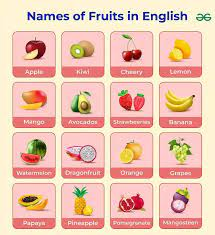
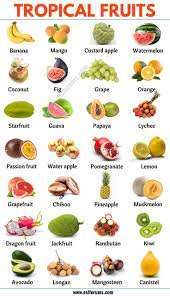
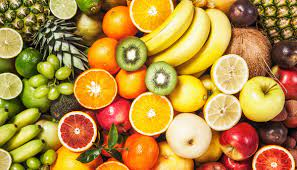
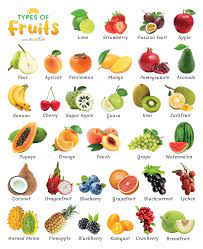
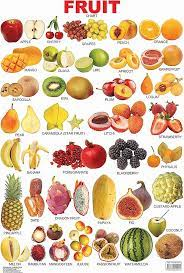
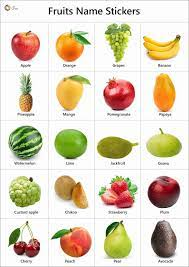
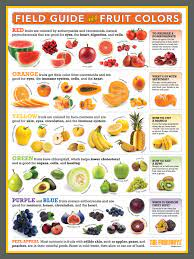
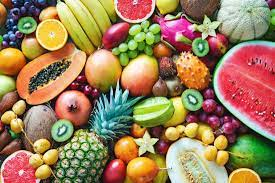
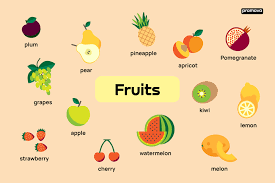
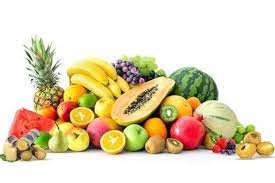
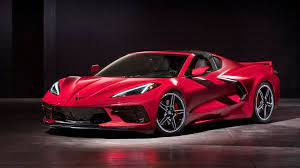
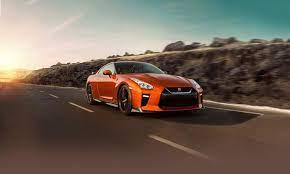
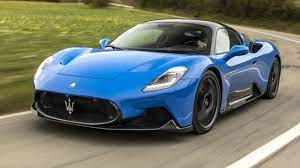
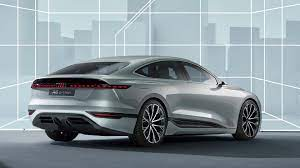
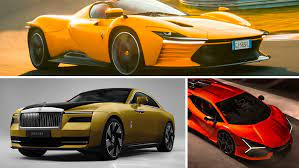
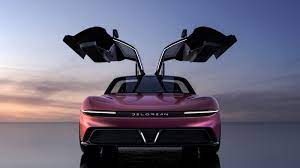
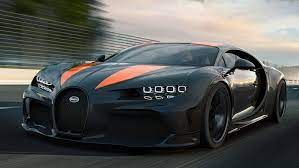
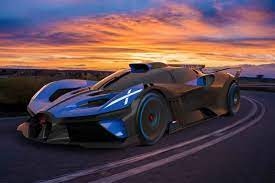
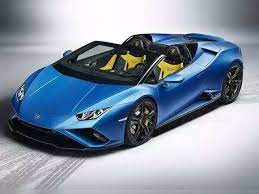
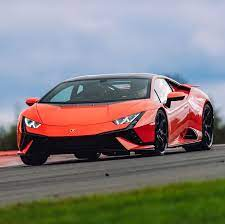
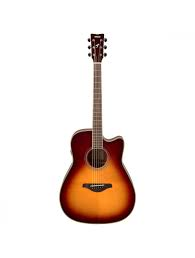
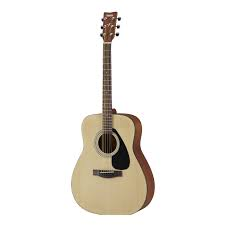
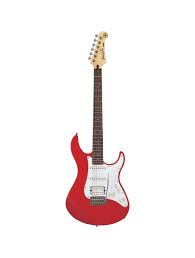
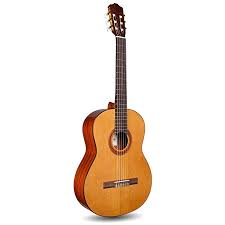
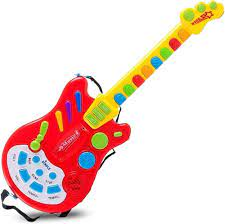
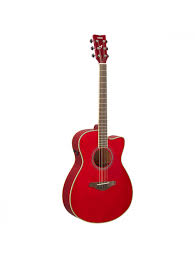
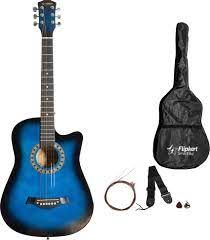
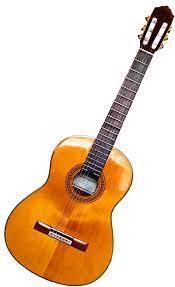
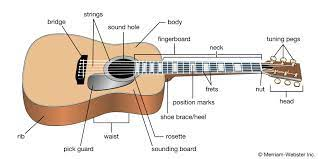
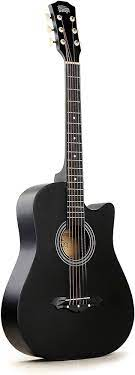
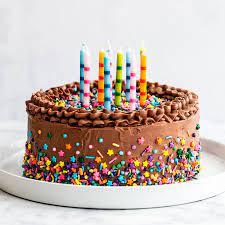
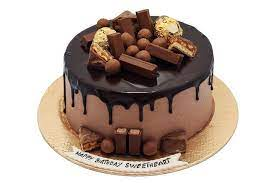
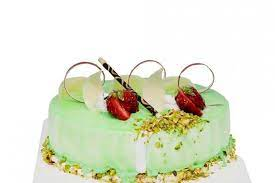
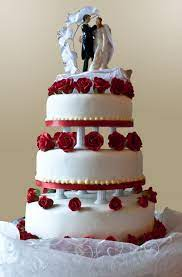
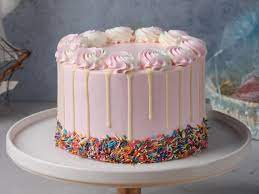
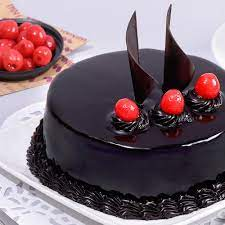
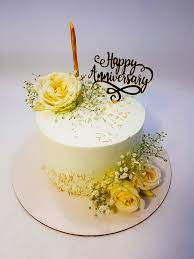
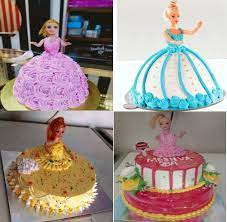
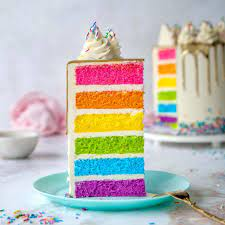
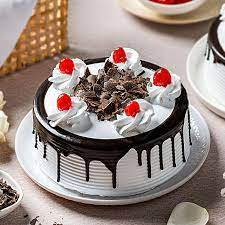

In [13]:
#cearing list
list_ = ['fruits','cars','Machine Learning','Guitar','Cakes']

Images = []

#extracting data by using loop
for item in list_:
    
   # getting webpage  
    driver = webdriver.Chrome()
    driver.get("https://www.google.com/")
    
    img = driver.find_element(By.XPATH,'/html/body/div[1]/div[1]/div/div/div/div/div[1]/div/div[2]/a')
    img.click()
    
    search_img = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/textarea")
    search_img.send_keys(item)
    
    search_button = driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
    search_button.click()
    time.sleep(2)
    
     #getting link of image
    Image = driver.find_elements(By.XPATH,'//div[@class="fR600b islir"]/img')
    for i in Image[0:10]:
        Images.append(i.get_attribute("src"))
    time.sleep(3)
        
    driver.close()
        
Images

In [15]:
#creating dataframe
img_df = pd.DataFrame({
    "Image Url" : Images
})
img_df

,Image Url
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
5,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
6,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
7,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
8,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
9,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."


### Q4

In [16]:
# import necessary libraries

import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import ElementNotInteractableException,NoSuchElementException
import warnings
warnings.filter = 'ignore'

In [17]:
# getting web page
driver = webdriver.Chrome()
driver.get("https://www.flipkart.com/")

In [18]:
# searching 
phone = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/div/input')
phone.send_keys("samsung galaxy s24 ultra")

search = driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div/div/div/div/div[1]/div/div[1]/div/div[1]/div[1]/header/div[1]/div[2]/form/div/button')
search.click()

In [19]:
#extracting link
Url = []
url = driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in url:
    Url.append(i.get_attribute("href"))
    
Url

['https://www.flipkart.com/samsung-galaxy-s24-ultra-5g-titanium-gray-256-gb/p/itm12ef5ea0212ed?pid=MOBGX2F3RQKKKTAW&lid=LSTMOBGX2F3RQKKKTAWKAVWET&marketplace=FLIPKART&q=samsung+galaxy+s24+ultra&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=e2c1cacc-83d9-491f-a220-1518bd6b5596.MOBGX2F3RQKKKTAW.SEARCH&ppt=hp&ppn=homepage&ssid=8g7uo0181s0000001707369892233&qH=5a5a9889a84105a6',
 'https://www.flipkart.com/samsung-galaxy-s24-ultra-5g-titanium-gray-512-gb/p/itm463827d6eb2be?pid=MOBGX2F3XNW3HK8K&lid=LSTMOBGX2F3XNW3HK8KCQXMCT&marketplace=FLIPKART&q=samsung+galaxy+s24+ultra&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=e2c1cacc-83d9-491f-a220-1518bd6b5596.MOBGX2F3XNW3HK8K.SEARCH&ppt=hp&ppn=homepage&ssid=8g7uo0181s0000001707369892233&qH=5a5a9889a84105a6',
 'https://www.flipkart.com/samsung-galaxy-s24-ultra-5g-titanium-black-256-gb/p/itm7d3b6b5d0f501?pid=MOBGX2F3QGZYYZAK&lid=LSTMOBGX2F3QGZYYZAKNETZ3C&marketplace=FLIPKART&q=samsung+galaxy+s

In [20]:
#creating empty list
Brand_Name = []
Smartphone_name = []
Color = []
RAM_ROM = []
Camera = [] 
Display_Size = [] 
Battery_Capacity = []
Price = []

#extracting data and excetion handling
for j in Url:
    driver.get(j)
    time.sleep(3)
    try:
        name = driver.find_element(By.XPATH,'//span[@class="B_NuCI"]')
        Brand_Name.append(name.text)
    except NoSuchElementException:
        Brand_name.append("-")
   
    try:
        s_name = driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"]/table/tbody/tr[3]/td[2]/ul/li')
        Smartphone_name.append(s_name.text)
    except NoSuchElementException:
        Smartphone_name.append("-")
        
    try:
        color = driver.find_element(By.XPATH,'//div[@class="_3k-BhJ"]/table/tbody/tr[4]/td[2]/ul/li')
        Color.append(color.text)
    except NoSuchElementException:
        Color.append("-")
   
    try:
        ram_rom = driver.find_element(By.XPATH,'//div[@class="_2418kt"]/ul/li[1]')
        RAM_ROM.append(ram_rom.text)
    except NoSuchElementException:
        RAM_ROM.append("-")
        
    try:
        camera = driver.find_element(By.XPATH,'//div[@class="_2418kt"]/ul/li[3]')
        Camera.append(camera.text)
    except NoSuchElementException:
        Camera.append("-")
        
    try:
        display = driver.find_element(By.XPATH,'//div[@class="_2418kt"]/ul/li[2]')
        Display_Size.append(display.text)
    except NoSuchElementException:
        Display_Size.append("-")
   
    try:
        battery = driver.find_element(By.XPATH,'//div[@class="_2418kt"]/ul/li[4]')
        Battery_Capacity.append(battery.text)
    except NoSuchElementException:
        Battery_Capacity.append("-")
        
    try:
        price = driver.find_element(By.XPATH,'//div[@class="_30jeq3 _16Jk6d"]')
        Price.append(price.text)
    except NoSuchElementException:
        Price.append("-")
        
        
driver.close()

In [21]:
#creating data frame
smartphone_df = pd.DataFrame({
    'Brand Name'      : Brand_Name,
    'Smartphone name' : Smartphone_name,
    'Color'           : Color,
    'RAM/ROM'         :RAM_ROM ,
    'Camera'          :Camera ,
    'Display Size'    :Display_Size,
    'Battery Capacity':Battery_Capacity, 
    'Price'           :Price
})


smartphone_df

,Brand Name,Smartphone name,Color,RAM/ROM,Camera,Display Size,Battery Capacity,Price
0,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Gray, 25...",Galaxy S24 Ultra 5G,Titanium Gray,12 GB RAM | 256 GB ROM,200MP + 50MP + 12MP + 10MP | 12MP Front Camera,17.27 cm (6.8 inch) Quad HD+ Display,5000 mAh Battery,"₹1,29,999"
1,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Gray, 51...",Galaxy S24 Ultra 5G,Titanium Gray,12 GB RAM | 512 GB ROM,200MP + 50MP + 12MP + 10MP | 12MP Front Camera,17.27 cm (6.8 inch) Quad HD+ Display,5000 mAh Battery,"₹1,39,999"
2,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Black, 2...",Galaxy S24 Ultra 5G,Titanium Black,12 GB RAM | 256 GB ROM,200MP + 50MP + 12MP + 10MP | 12MP Front Camera,17.27 cm (6.8 inch) Quad HD+ Display,5000 mAh Battery,"₹1,29,999"
3,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Violet, ...",Galaxy S24 Ultra 5G,Titanium Violet,12 GB RAM | 256 GB ROM,200MP + 50MP + 12MP + 10MP | 12MP Front Camera,17.27 cm (6.8 inch) Quad HD+ Display,5000 mAh Battery,"₹1,29,999"
4,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Black, 5...",Galaxy S24 Ultra 5G,Titanium Black,12 GB RAM | 512 GB ROM,200MP + 50MP + 12MP + 10MP | 12MP Front Camera,17.27 cm (6.8 inch) Quad HD+ Display,5000 mAh Battery,"₹1,39,999"
5,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Violet, ...",Galaxy S24 Ultra 5G,Titanium Violet,12 GB RAM | 512 GB ROM,200MP + 50MP + 12MP + 10MP | 12MP Front Camera,17.27 cm (6.8 inch) Quad HD+ Display,5000 mAh Battery,"₹1,39,999"
6,"SAMSUNG Galaxy S24 Ultra 5G (Titanium Gray, 1 ...",Galaxy S24 Ultra 5G,Titanium Gray,12 GB RAM | 1 TB ROM,200MP + 50MP + 12MP + 10MP | 12MP Front Camera,17.27 cm (6.8 inch) Quad HD+ Display,5000 mAh Battery,"₹1,59,999"
7,"SAMSUNG Galaxy S22 ultra 5G (Burgundy, 256 GB)...",Galaxy S22 ultra 5G,Burgundy,12 GB RAM | 256 GB ROM,108MP Rear Camera | 40MP Front Camera,17.27 cm (6.8 inch) Display,5000 mAh Battery,"₹1,30,376"


In [22]:
#save into csv file
smartphone_df.to_csv("smartphone_df.csv",index = False)

### Q5

In [23]:
# import necessary libraries

import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import ElementNotInteractableException,NoSuchElementException
import warnings
warnings.filter = 'ignore'
from selenium.webdriver.common.action_chains import ActionChains

In [24]:
#getting web page
driver = webdriver.Chrome()
driver.get("https://www.google.co.in/maps")

city = str(input("Enter city name : "))   # teking input from user
time.sleep(2)

Enter city name : surat


In [25]:
#searching city
find_city = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/form/input')
find_city.send_keys(city)

search = driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/div[8]/div[3]/div[1]/div[1]/div/div[2]/div[1]/button')
search.click()
time.sleep(2)

#right click using selenium
action = ActionChains(driver)
action.context_click(driver.find_element(By.XPATH,'//div[@class="iBPHvd widget-scene"]/canvas[1]')).perform()
time.sleep(2)

In [26]:
#extracting data
latitude_longitude = []
l = driver.find_element(By.XPATH,'//div[@class="twHv4e"]/div[1]')
latitude_longitude.append(l.text)
print("latitude and longitude of " ,city, "is",latitude_longitude)
driver.close()

latitude and longitude of  surat is ['21.15912, 72.65748']


### Q6

In [27]:
#import necessory libraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import ElementNotInteractableException,NoSuchElementException
import warnings
warnings.filter = 'ignore'

In [28]:
#getting webpage
driver = webdriver.Chrome()
driver.get("https://www.digit.in/")

In [29]:
#searching 

top_10_gaming_laptop = driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div/div/div[2]/form/input[1]")
top_10_gaming_laptop.send_keys('top 10 gaming laptop')

search = driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div/div/div[2]/form/button')
search.click()
time.sleep(2)

In [30]:
#extracting data
Laptop_name = []
laptop = driver.find_elements(By.XPATH,'//h3[@class=" text-clamp text-clamp-2"]/a')
for i in laptop[0:10]:
    Laptop_name.append(i.text)
time.sleep(2)    
Laptop_name

['Lenovo IdeaPad Gaming 3 11th Gen Core i5-11320H (82K101L7IN)',
 'acer Predator Helios 300 PH315-53 10th Gen Core i7-10870H',
 'Lenovo IdeaPad Gaming 3 15IAH7',
 'Lenovo IdeaPad Gaming 3i',
 'Lenovo Ideapad gaming 3',
 'Dell 15 (2021) i5-10200H',
 'Lenovo Legion 5 Pro 11th Gen Core i7-11800H (82JD005KIN)',
 'Acer Aspire 5 13th Gen Core i5-1335U (A514-56GM)',
 'Acer Nitro 5 AN515-47 Ryzen5-7535HS (2023)',
 'Acer Aspire 5']

In [31]:
#extracting data
Laptop_price = []
Price = []
import re
price = driver.find_elements(By.XPATH,'//div[@class="border-top pt10 pr10 pl10 pb10 rh-flex-center-align abposbot"]/div/span')
for i in price[0:10]:
    Price.append(re.sub("","",i.text).splitlines())
    
Laptop_price = []
for j in Price:
    Laptop_price.append(j[0])
time.sleep(2)    
Laptop_price

['₹78,790.00',
 'Rs. 81,871',
 '₹79,831.00',
 'out of stock',
 'out of stock',
 'out of stock',
 'Rs. 124,990',
 'Rs. 56,990',
 'Rs. 72,499',
 'out of stock']

In [32]:
#extracting data
Url = []
url = driver.find_elements(By.XPATH,'//figure[@class="mb15 mt25 position-relative"]/a')
for j in url[0:10]:
    Url.append(j.get_attribute("href"))
time.sleep(2)  
Url

['https://www.digit.in/laptops/lenovo-ideapad-gaming-3-11th-gen-core-i5-11320h-82k101l7in-price-350430.html',
 'https://www.digit.in/laptops/acer-predator-helios-300-ph315-53-10th-gen-core-i7-10870h-price-345750.html',
 'https://www.digit.in/laptops/lenovo-ideapad-gaming-3-15iah7-price-341574.html',
 'https://www.digit.in/laptops/lenovo-ideapad-gaming-3i-price-319434.html',
 'https://www.digit.in/laptops/lenovo-ideapad-gaming-3-82k201ugin-ryzen-5-5600h-2022-price-311185.html',
 'https://www.digit.in/laptops/dell-15-2021-i5-10200h-price-287917.html',
 'https://www.digit.in/laptops/lenovo-legion-5-pro-11th-gen-core-i7-11800h-82jd005kin-price-350484.html',
 'https://www.digit.in/laptops/acer-aspire-5-13th-gen-core-i5-1335u-a514-56gm-price-347496.html',
 'https://www.digit.in/laptops/acer-nitro-5-an515-47-ryzen5-7535hs-2023-price-344787.html',
 'https://www.digit.in/laptops/acer-aspire-5-a515-56-11th-gen-core-i5-1135g7-2021-price-328974.html']

In [33]:
#creating dataframe
laptop_df = pd.DataFrame({
    "Laptop Name": Laptop_name,
    "Price"      : Laptop_price,
    "Link"       : Url
})
laptop_df

,Laptop Name,Price,Link
0,Lenovo IdeaPad Gaming 3 11th Gen Core i5-11320...,"₹78,790.00",https://www.digit.in/laptops/lenovo-ideapad-ga...
1,acer Predator Helios 300 PH315-53 10th Gen Cor...,"Rs. 81,871",https://www.digit.in/laptops/acer-predator-hel...
2,Lenovo IdeaPad Gaming 3 15IAH7,"₹79,831.00",https://www.digit.in/laptops/lenovo-ideapad-ga...
3,Lenovo IdeaPad Gaming 3i,out of stock,https://www.digit.in/laptops/lenovo-ideapad-ga...
4,Lenovo Ideapad gaming 3,out of stock,https://www.digit.in/laptops/lenovo-ideapad-ga...
5,Dell 15 (2021) i5-10200H,out of stock,https://www.digit.in/laptops/dell-15-2021-i5-1...
6,Lenovo Legion 5 Pro 11th Gen Core i7-11800H (8...,"Rs. 124,990",https://www.digit.in/laptops/lenovo-legion-5-p...
7,Acer Aspire 5 13th Gen Core i5-1335U (A514-56GM),"Rs. 56,990",https://www.digit.in/laptops/acer-aspire-5-13t...
8,Acer Nitro 5 AN515-47 Ryzen5-7535HS (2023),"Rs. 72,499",https://www.digit.in/laptops/acer-nitro-5-an51...
9,Acer Aspire 5,out of stock,https://www.digit.in/laptops/acer-aspire-5-a51...


In [34]:
driver.close()

### Q7

In [35]:
#import necessory libraries

import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import ElementNotInteractableException,NoSuchElementException
import warnings
warnings.filter = 'ignore'

In [36]:
#getting web page
driver = webdriver.Chrome()
driver.get("http://www.forbes.com/")

In [37]:
#searching
option = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div')
option.click()
time.sleep(2)

billionaires = driver.find_element(By.XPATH,'//div[@class="_8FT-x3t4"]/div[2]/ul/li[2]/div[1]/span')
billionaires.click()
time.sleep(2)

List = driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div[1]/div/div[2]/ul/li[2]/div[2]/div[3]/ul/li[1]')
List.click()
time.sleep(2)

Click = driver.find_element(By.XPATH,'/html/body/div[1]/div[2]/div[3]/div[2]/div[2]/div[2]/div[1]/div[1]/div[1]/div[2]/div[1]/div[1]/div[2]/div')
Click.click()

#maximizing chrome window
driver.maximize_window()

In [38]:
##extracting Data
Data = []
data = driver.find_elements(By.XPATH,'//div[@class="TableRow_row__L-0Km"]')
for i in data:
    Data.append((i.text).splitlines())
    
Data

[['1',
  'Bernard Arnault & family',
  '$211 B',
  '74',
  'France',
  'LVMH',
  'Fashion & Retail'],
 ['2',
  'Elon Musk',
  '$180 B',
  '51',
  'United States',
  'Tesla, SpaceX',
  'Automotive'],
 ['3', 'Jeff Bezos', '$114 B', '59', 'United States', 'Amazon', 'Technology'],
 ['4',
  'Larry Ellison',
  '$107 B',
  '78',
  'United States',
  'Oracle',
  'Technology'],
 ['5',
  'Warren Buffett',
  '$106 B',
  '92',
  'United States',
  'Berkshire Hathaway',
  'Finance & Investments'],
 ['6',
  'Bill Gates',
  '$104 B',
  '67',
  'United States',
  'Microsoft',
  'Technology'],
 ['7',
  'Michael Bloomberg',
  '$94.5 B',
  '81',
  'United States',
  'Bloomberg LP',
  'Media & Entertainment'],
 ['8',
  'Carlos Slim Helu & family',
  '$93 B',
  '83',
  'Mexico',
  'Telecom',
  'Telecom'],
 ['9',
  'Mukesh Ambani',
  '$83.4 B',
  '65',
  'India',
  'Diversified',
  'Diversified'],
 ['10',
  'Steve Ballmer',
  '$80.7 B',
  '67',
  'United States',
  'Microsoft',
  'Technology'],
 ['11',
  'F

In [39]:
#creating dataframe
billionaires_df = pd.DataFrame(Data,columns=['RANK', 'NAME', 'NET WORTH', 'AGE', 'COUNTRY / TERRITORY', 'SOURCE', 'INDUSTRY'])
billionaires_df 

,RANK,NAME,NET WORTH,AGE,COUNTRY / TERRITORY,SOURCE,INDUSTRY
0,1,Bernard Arnault & family,$211 B,74,France,LVMH,Fashion & Retail
1,2,Elon Musk,$180 B,51,United States,"Tesla, SpaceX",Automotive
2,3,Jeff Bezos,$114 B,59,United States,Amazon,Technology
3,4,Larry Ellison,$107 B,78,United States,Oracle,Technology
4,5,Warren Buffett,$106 B,92,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,195,Jin Baofang,$9.6 B,70,China,Solar panels,Energy
196,195,Luo Liguo & family,$9.6 B,67,China,Chemicals,Manufacturing
197,195,Marijke Mars,$9.6 B,58,United States,"Candy, pet food",Food & Beverage
198,195,Pamela Mars,$9.6 B,62,United States,"Candy, pet food",Food & Beverage


In [40]:
driver.close()

### Q8

In [56]:
import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import ElementNotInteractableException,NoSuchElementException
import warnings
warnings.filter = 'ignore'

In [58]:
driver = webdriver.Chrome()
driver.get("https://www.youtube.com/watch?v=jNQXAC9IVRw")
time.sleep(3)

In [59]:
#scrolling web page by selenium
for _ in range(60):
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
    time.sleep(2)

In [60]:
#creating empty list
Comment = []
Vote = []
Time = []

In [61]:
#extracting data

comment = driver.find_elements(By.XPATH,'//div[@id="comment-content"]')
for i in comment:
    Comment.append(i.text)

vote = driver.find_elements(By.XPATH,'//span[@id="vote-count-middle"]')
for i in vote:
    Vote.append(i.text)

time = driver.find_elements(By.XPATH,'//div[@id="header-author"]/yt-formatted-string')
for j in time:
    Time.append(j.text)

In [62]:
len(Comment),len(Vote),len(Time)

(540, 540, 540)

In [63]:
#crating dataframe
comment_df = pd.DataFrame({
    "Comment"             : Comment[0:500],
    "Vote on Comment"     : Vote[0:500],
    "Comment uplode time" : Time[0:500]
})

In [64]:
comment_df

,Comment,Vote on Comment,Comment uplode time
0,We're so honored that the first ever YouTube v...,3.5M,3 years ago
1,"First word ever said on youtube was ""Alright""",225K,4 years ago
2,This is one of the most historic videos in the...,4.5K,11 days ago
3,18 long years and jawed i still checkup on thi...,1.5K,9 days ago
4,"We're finally in 2024 and I can finally say, t...",29,4 hours ago
...,...,...,...
495,"Randomly found when I was searching for ""my ne...",,2 days ago
496,is he alive now? This video is really great.,1,10 days ago
497,Thank you for the blessing of YouTube,,1 day ago
498,my kids will learn about this video in their h...,6.5K,2 years ago


In [65]:
driver.close()

### Q9

In [66]:
#import necessory liabraries
import pandas as pd
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import ElementNotInteractableException,NoSuchElementException
import warnings
warnings.filter = 'ignore'

In [67]:
#getting webpage
driver = webdriver.Chrome()
driver.get("http://www.hostelworld.com/")
time.sleep(2)

In [68]:
# searching 
try:
    loc = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div[1]/div/div[2]/input')
    loc.send_keys("London")
except NoSuchElementException:
    loc = driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div[2]/div/div/div/div[1]/div/div/div[2]/input')
    loc.send_keys("London")
time.sleep(2)

In [69]:
# clicking
loc2 = driver.find_element(By.XPATH,'//ul[@class="select-list"]/li[2]')
loc2.click()
time.sleep(2)

In [70]:
#Handling exeption
try:
    button = driver.find_element(By.XPATH,'//button[@class="btn-content large-button"]')
    button.click()
except ElementNotInteractableException:
    button = driver.find_element(By.XPATH,'//button[@class="btn-content medium-button icon-only"]')
    button.click()
time.sleep(2)

In [71]:
#creating empty list
Name = []
Distance_from_city = []
Rating = []
Total_reviews = []
Overall_reviews = []
Privates_from_price = []
Droms_from_price = []
Facilites = []
Property_description = []
Url = []

In [72]:
#extracting data
start,end = 0,3
for page in range(start,end):
    time.sleep(2)
    
    name = driver.find_elements(By.XPATH,'//div[@class="property-info-header"]/div[1]/span')
    for i in name:
        Name.append(i.text)
    
    distance = driver.find_elements(By.XPATH,'//span[@class="distance-description"]')
    for j in distance:
        Distance_from_city.append(j.text)
        
    rating = driver.find_elements(By.XPATH,'//div[@class="property-info-header"]/div[2]/div/div[1]/span[1]')
    for k in rating:
        Rating.append(k.text)
        
    t_reviews = driver.find_elements(By.XPATH,'//span[@class="left-margin"]')
    for l in t_reviews:
        Total_reviews.append(l.text)
        
    o_reviews= driver.find_elements(By.XPATH,'//div[@class="property-info-header"]/div[2]/div/div[1]/span[2]')
    for m in o_reviews:
        Overall_reviews.append(m.text)
        
    p_price = driver.find_elements(By.XPATH,'//div[@class="property-accommodation-prices"]/div[1]')
    for n in p_price:
        Privates_from_price.append((n.text).replace("\n"," "))
        
    d_price = driver.find_elements(By.XPATH,'//a[@class="property-card-container horizontal"]')
    for k in d_price:
        Droms_from_price.append(k.get_attribute("pricefrom"))

time.sleep(2)



In [73]:
#filtaring data
new_Privates_from_price = []
import re
for i in Privates_from_price:
    if (i == 'No Privates Available'):
        new_Privates_from_price.append(i)
    else :
        j=(re.findall(r"(₹\d+,\d+)$",i))
        new_Privates_from_price.append(j)

In [74]:
#getting hostel links
start,end = 0,3
for page in range(start,end):
    url = driver.find_elements(By.XPATH,'//a[@class="property-card-container horizontal"]')
    for link in url:
        Url.append(link.get_attribute("href"))
Url

["https://www.hostelworld.com/pwa/hosteldetails.php/Wombat's%20City%20Hostel%20London/London/88047?from=2024-02-09&to=2024-02-12&guests=2",
 'https://www.hostelworld.com/pwa/hosteldetails.php/Palmers%20Lodge%20-%20Swiss%20Cottage/London/14348?from=2024-02-09&to=2024-02-12&guests=2',
 "https://www.hostelworld.com/pwa/hosteldetails.php/St%20Christopher's%20Village/London/502?from=2024-02-09&to=2024-02-12&guests=2",
 'https://www.hostelworld.com/pwa/hosteldetails.php/NX%20London%20Hostel/London/15204?from=2024-02-09&to=2024-02-12&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Urbany%20Hostel%20London/London/303427?from=2024-02-09&to=2024-02-12&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Onefam%20Notting%20Hill/London/291433?from=2024-02-09&to=2024-02-12&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Generator%20London/London/510?from=2024-02-09&to=2024-02-12&guests=2',
 'https://www.hostelworld.com/pwa/hosteldetails.php/Onefam%20Waterloo/

In [75]:
#getting data from hostel links
for j in Url:
    driver.get(j)
    
    description = driver.find_element(By.XPATH,'//div[@class="description-container"]/div/div[2]')
    Property_description.append(description.text)
        
    facilities = driver.find_element(By.XPATH,'//div[@id="facilities-section"]/div/ul/li[1]')
    Facilites.append((facilities.text).replace("\n"," "))

In [76]:
driver.close()

In [77]:
#Creating DataFrame
hostel_df = pd.DataFrame({
                "Name"                : Name,
                "Distance from city"  : Distance_from_city,
                "Rating"              : Rating,
                "Total reviews"       : Total_reviews,
                "Overall reviews"     : Overall_reviews,
                "Privates from price" : new_Privates_from_price,
                "Droms_from price"    : Droms_from_price,
                "Facilites"           : Facilites,
                "Property description": Property_description
})

In [78]:
hostel_df

,Name,Distance from city,Rating,Total reviews,Overall reviews,Privates from price,Droms_from price,Facilites,Property description
0,Wombat's City Hostel London,- 3.6km from city centre,9.1,(15894),Superb,"[₹13,229]","₹13,229",Free Linen Included Free City Maps Free WiFi F...,A safe haven in the middle of the metropolis: ...
1,Palmers Lodge - Swiss Cottage,- 6.5km from city centre,8.8,(15971),Fabulous,No Privates Available,"₹2,465",Free Linen Included Free WiFi Free Internet Ac...,Palmers Lodge Swiss Cottage is set in what one...
2,St Christopher's Village,- 1.8km from city centre,7.8,(12871),Very Good,No Privates Available,"₹1,664",Free Linen Included Free WiFi Free Internet Ac...,Hostelworld visitors have said St Christopher'...
3,NX London Hostel,- 6.1km from city centre,8.9,(2146),Fabulous,"[₹12,866]","₹2,910",Free Free Breakfast Linen Included Towels Incl...,Welcome to NX London Hostel!\n\nPLEASE READ IN...
4,Urbany Hostel London,- 5.4km from city centre,9.5,(1125),Superb,"[₹12,469]","₹3,318",Free Linen Included Free WiFi,"Welcome to Urbany Hostel London, our first int..."
...,...,...,...,...,...,...,...,...,...
85,Astor Kensington,- 4.9km from city centre,8.5,(6594),Fabulous,"[₹9,680]","₹1,760",Free Linen Included Free City Maps Free WiFi,Note: 18-40 yrs old only. Astor Kensington won...
86,St Christopher's Hammersmith,- 7.5km from city centre,7.7,(4389),Very Good,No Privates Available,"₹1,873",Free Linen Included Free City Maps Free WiFi F...,"The friendly, attentive, and welcoming staff o..."
87,Astor Victoria,- 1.8km from city centre,7.3,(15097),Very Good,"[₹10,895]","₹1,956",Free Linen Included Free City Maps Free WiFi F...,Note: 18-40 yrs old only. Astor Victoria won 1...
88,Phoenix Hostel,- 4.2km from city centre,6.3,(4624),Good,"[₹5,703]","₹1,523",Free Linen Included Free City Maps Free WiFi F...,"The Phoenix Bar & Hostel, housed in a homely E..."
